In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import os

class CustomImageDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.img_files = os.listdir(img_dir)
        self.transform = transform

    def __len__(self):
        return len(self.img_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_files[idx])
        image = Image.open(img_path).convert('L')  # 'L' for grayscale
        if self.transform:
            image = self.transform(image)
        return image


In [2]:
transform = transforms.Compose([
    transforms.Resize((28, 28)),  # Resize images to 28x28
    transforms.ToTensor(),        # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize pixel values between -1 and 1
])

dataset = CustomImageDataset(img_dir=r'C:\Project\Step1\GAN\Images', transform=transform)
train_loader = DataLoader(dataset, batch_size=128, shuffle=True)


In [3]:
input_dim = 64 * 64  # For 64x64 images
hidden_dim = 400
latent_dim = 20

In [4]:
class ConvEncoder(nn.Module):
    def __init__(self, latent_dim):
        super(ConvEncoder, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 4, stride=2, padding=1)  # 1 input channel for grayscale images
        self.conv2 = nn.Conv2d(32, 64, 4, stride=2, padding=1)
        self.fc1 = nn.Linear(64*16*16, 128)
        self.fc_mu = nn.Linear(128, latent_dim)
        self.fc_logvar = nn.Linear(128, latent_dim)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(-1, 64*16*16)  # Flatten feature maps
        h = F.relu(self.fc1(x))
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar


In [5]:
class ConvDecoder(nn.Module):
    def __init__(self, latent_dim):
        super(ConvDecoder, self).__init__()
        self.fc1 = nn.Linear(latent_dim, 64*16*16)
        self.deconv1 = nn.ConvTranspose2d(64, 32, 4, stride=2, padding=1)
        self.deconv2 = nn.ConvTranspose2d(32, 1, 4, stride=2, padding=1)  # 1 output channel for grayscale

    def forward(self, z):
        h = F.relu(self.fc1(z))
        h = h.view(-1, 64, 16, 16)  # Reshape into feature maps
        h = F.relu(self.deconv1(h))
        x_recon = torch.sigmoid(self.deconv2(h))
        return x_recon


In [6]:
class ConvVAE(nn.Module):
    def __init__(self, latent_dim):
        super(ConvVAE, self).__init__()
        self.encoder = ConvEncoder(latent_dim)
        self.decoder = ConvDecoder(latent_dim)

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = reparameterize(mu, logvar)
        return self.decoder(z), mu, logvar


In [7]:
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD


In [8]:
def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    print(f"Shape after conv layers: {x.shape}")  # Add this to check the output shape
    x = x.view(x.size(0), -1)  # Automatically flatten based on batch size
    h = F.relu(self.fc1(x))
    mu = self.fc_mu(h)
    logvar = self.fc_logvar(h)
    return mu, logvar


In [9]:
class ConvEncoder(nn.Module):
    def __init__(self, latent_dim):
        super(ConvEncoder, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 4, stride=2, padding=1)  # Adjust input channels if needed
        self.conv2 = nn.Conv2d(32, 64, 4, stride=2, padding=1)
        
        # Replace 64*16*16 with correct input size based on the output of conv layers
        self.fc1 = nn.Linear(64 * 8 * 8, 128)  # Example value, adjust based on your input size
        self.fc_mu = nn.Linear(128, latent_dim)
        self.fc_logvar = nn.Linear(128, latent_dim)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        print(f"Shape after conv layers: {x.shape}")  # Debugging: check the actual shape
        x = x.view(x.size(0), -1)  # Flatten the tensor
        h = F.relu(self.fc1(x))
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar


In [22]:

class ConvDecoder(nn.Module):
    def __init__(self, latent_dim):
        super(ConvDecoder, self).__init__()
        self.fc = nn.Linear(latent_dim, 64 * 7 * 7)
        self.deconv1 = nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1)
        self.deconv2 = nn.ConvTranspose2d(32, 1, kernel_size=4, stride=2, padding=1)

    def forward(self, z):
        x = F.relu(self.fc(z))
        x = x.view(-1, 64, 7, 7)
        x = F.relu(self.deconv1(x))
        x = self.deconv2(x)
        x = torch.sigmoid(x)  # Apply sigmoid to ensure output is in [0, 1]
        return x

loss_function = nn.BCEWithLogitsLoss(reduction='sum')



In [23]:
def reparameterize(mu, logvar):
    """
    Reparameterization trick to sample z from N(mu, var) given the mean (mu) and log-variance (logvar).
    """
    std = torch.exp(0.5 * logvar)  # Calculate standard deviation
    eps = torch.randn_like(std)  # Sample from a standard normal distribution
    return mu + eps * std  # Return the sampled latent vector

class ConvVAE(nn.Module):
    def __init__(self, latent_dim):
        super(ConvVAE, self).__init__()
        self.encoder = ConvEncoder(latent_dim)
        self.decoder = ConvDecoder(latent_dim)

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = reparameterize(mu, logvar)  # Use the reparameterization trick here
        return self.decoder(z), mu, logvar

In [24]:
class ConvEncoder(nn.Module):
    def __init__(self, latent_dim):
        super(ConvEncoder, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 4, stride=2, padding=1)  # Adjust input channels if needed
        self.conv2 = nn.Conv2d(32, 64, 4, stride=2, padding=1)
        
        # Use the correct flattened size based on conv output: 64 * 7 * 7 = 3136
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # Update to match flattened size
        self.fc_mu = nn.Linear(128, latent_dim)
        self.fc_logvar = nn.Linear(128, latent_dim)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        print(f"Shape after conv layers: {x.shape}")  # Debugging: check the actual shape
        x = x.view(x.size(0), -1)  # Flatten the tensor
        h = F.relu(self.fc1(x))
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar


In [20]:
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

In [ ]:
# Define device: use GPU if available, otherwise fall back to CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


vae = ConvVAE(latent_dim=20)  # Change latent_dim based on your needs
optimizer = optim.Adam(vae.parameters(), lr=1e-3)

def train(epoch):
    vae.train()
    train_loss = 0
    for batch_idx, data in enumerate(train_loader):
        data = data.to(device)  # Ensure data is on the correct device (GPU or CPU)
        optimizer.zero_grad()
        recon_batch, mu, logvar = vae(data)
        loss = loss_function(recon_batch, data)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f"Epoch {epoch} [Batch {batch_idx}/{len(train_loader)}] Loss: {loss.item() / len(data)}")

    print(f"====> Epoch: {epoch} Average loss: {train_loss / len(train_loader.dataset)}")

for epoch in range(1, 200):
    train(epoch)


Shape after conv layers: torch.Size([128, 64, 7, 7])
Epoch 1 [Batch 0/53] Loss: 942.3436279296875
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
S

Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([47, 64, 7, 7])
====> Epoch: 3 Average loss: 543.4274901979525
Shape after conv layers: torch.Size([128, 64, 7, 7])
Epoch 4 [Batch 0/53] Loss: 543.427490234375
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape aft

Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([47, 64, 7, 7])
====> Epoch: 6 Average loss: 543.4274901979525
Shape after conv layers: torch.Size([128, 64, 7, 7])


Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 

Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 

Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 

Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 

Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([47, 64, 7, 7])
====> Epoch: 20 Average loss: 543.4274901979525
Shape after conv layers: torch.Size([128, 64, 7, 7])
Epoch 21 [Batch 0/53] Loss: 543.427490234375
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape a

Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([47, 64, 7, 7])
====> Epoch: 23 Average loss: 543.4274901979525
Shape after conv layers: torch.Size([128, 64, 7, 7])
Epoch 24 [Batch 0/53] Loss: 543.427490234375
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape a

Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 

Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 

Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 

Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 

Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([47, 64, 7, 7])
====> Epoch: 37 Average loss: 543.4274901979525
Shape after conv layers: torch.Size([128, 64, 7, 7])
Epoch 38 [Batch 0/53] Loss: 543.427490234375
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape a

Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([47, 64, 7, 7])
====> Epoch: 40 Average loss: 543.4274901979525
Shape after conv layers: torch.Size([128, 64, 7, 7])
Epoch 41 [Batch 0/53] Loss: 543.427490234375
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape a

Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 

Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 

Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 

Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 

Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([47, 64, 7, 7])
====> Epoch: 54 Average loss: 543.4274901979525
Shape after conv layers: torch.Size([128, 64, 7, 7])
Epoch 55 [Batch 0/53] Loss: 543.427490234375
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape a

Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([47, 64, 7, 7])
====> Epoch: 57 Average loss: 543.4274901979525
Shape after conv layers: torch.Size([128, 64, 7, 7])
Epoch 58 [Batch 0/53] Loss: 543.427490234375
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape a

Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 

Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 

Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 

Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 

Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([47, 64, 7, 7])
====> Epoch: 71 Average loss: 543.4274901979525
Shape after conv layers: torch.Size([128, 64, 7, 7])
Epoch 72 [Batch 0/53] Loss: 543.427490234375
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape a

Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([47, 64, 7, 7])
====> Epoch: 74 Average loss: 543.4274901979525
Shape after conv layers: torch.Size([128, 64, 7, 7])
Epoch 75 [Batch 0/53] Loss: 543.427490234375
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape a

Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 7, 7])
Shape after conv layers: torch.Size([128, 64, 

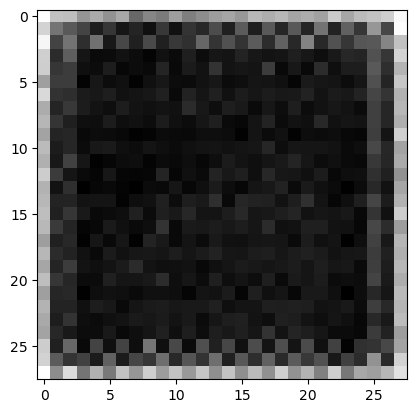

In [29]:
from matplotlib import pyplot as plt
# Generate new samples from the latent space after training
with torch.no_grad():
    z = torch.randn(64, latent_dim).to(device)  # Sample from the latent space
    sample = vae.decoder(z).cpu()
    plt.imshow(sample[0].squeeze(), cmap='gray')  # Visualize the generated image
    plt.show()

